# Ford GoBike Dataset
## by Omar Ahmad Abdalaziz

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load the dataset into the dataframe and presenting the first 5 records of our dataset
df_goBike = pd.read_csv("../Data/201902-fordgobike-tripdata.csv")
df_goBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# display the dimensions of out dataset (no. of columns and rows)
print(df_goBike.shape)

(183412, 16)


### What is the structure of your dataset?

There are 183412 records and 16 Attributes. Some variables are numeric while some are nominal or categorical, such as station name and user type.

### What is/are the main feature(s) of interest in your dataset?

The main features that grasped my interest in the dataset would be the duration, date and user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Date, Duration and User type are the most likely variables to influence the investigation, but features such as gender and days of the week may influence the investgation to a lesser extent.

# Initial Findings
### After taking a breif look over the data it seems to have some common problems in most datasets
#### 1- Missing Values
#### 2- Irrelevant Features
#### 3- Incorrect formats
#### 4- An Important variable is missing which is the name of the day of the week
#### 5- The duration is measured in seconds which can be confusing to use for analysis
### We will be adressing these problems in the data cleaning section below.

# Data Cleaning
### This next section is where we clean data by: getting rid of irrelevant features, missing values, etc.

In [4]:
# checking for missing values
df_goBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
# checking for duplicates
df_goBike.duplicated().sum()

0

In [6]:
# Removing records with missing values and recheck for missing values
df_goBike.dropna(inplace=True)

In [7]:
# check if nulls are removed
df_goBike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# removing irrelevant columns
df_goBike.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],inplace=True)
df_goBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [9]:
# Add a duration in minutes and hours
df_goBike.insert(1, 'duration_min',df_goBike.duration_sec/60)
df_goBike.insert(2, 'duration_hour',df_goBike.duration_min/60)

In [10]:
# transform start and end time to datetime type
df_goBike[['start_time','end_time']] = df_goBike[['start_time','end_time']].apply(pd.to_datetime)

In [11]:
# Add day of the week column for both start and end time
df_goBike.insert(4,'start_day',df_goBike['start_time'].dt.day_name())
df_goBike.insert(6,'end_day',df_goBike['end_time'].dt.day_name())

In [12]:
# Checking if the new columns were added
df_goBike.head()

,duration_sec,duration_min,duration_hour,start_time,start_day,end_time,end_day,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,2019-02-28 17:32:10.145,Thursday,2019-03-01 08:01:55.975,Friday,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,1030.900000,17.181667,2019-02-28 12:13:13.218,Thursday,2019-03-01 05:24:08.146,Friday,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,608.166667,10.136111,2019-02-28 17:54:26.010,Thursday,2019-03-01 04:02:36.842,Friday,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,26.416667,0.440278,2019-02-28 23:54:18.549,Thursday,2019-03-01 00:20:44.074,Friday,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,29.883333,0.498056,2019-02-28 23:49:58.632,Thursday,2019-03-01 00:19:51.760,Friday,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [13]:
df_goBike.describe()

,duration_sec,duration_min,duration_hour,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,11.733379,0.195556,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,27.370082,0.456168,111.648819,111.335635,1659.195937,10.118731
min,61.000000,1.016667,0.016944,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,5.383333,0.089722,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,8.500000,0.141667,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,13.150000,0.219167,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,1409.133333,23.485556,398.000000,398.000000,6645.000000,2001.000000


## Univariate Exploration

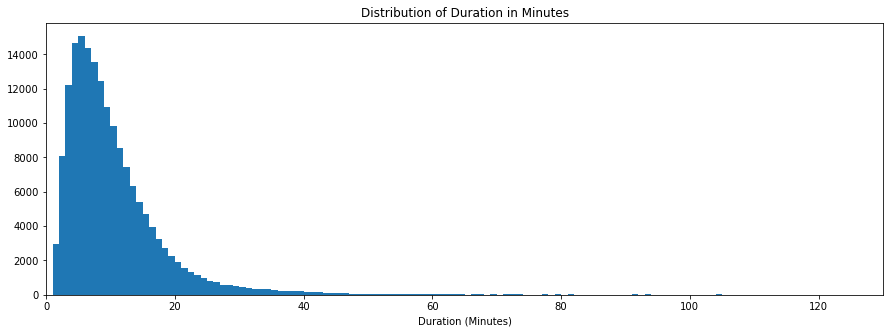

In [14]:
binsize = 1
bins = np.arange(0, df_goBike['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = df_goBike, x = 'duration_min', bins = bins)
plt.xlabel('Duration (Minutes)')
plt.xlim(0,130)
plt.title('Distribution of Duration in Minutes')
plt.show()

#### It seems that the most frequent duration is around 5 minutes and as we can see, the curve takes a sharp drop beyond this value.
#### The duration seems to be concentraited from 2 to 13 minutes
#### In the next stage of analysis I would like to observe more what could influence the duration, such as user type, day of the week or gender.

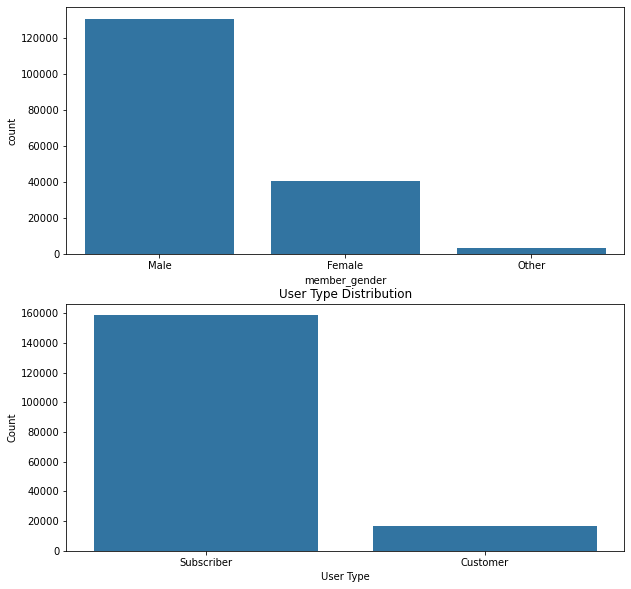

In [25]:
#function for labeling plots
def xytitle(xaxis,yaxis,title):
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)    
    plt.title(title)
# the number of males, females and other relative to one another
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
base_color = sb.color_palette()[0]
sb.countplot(data = df_goBike, x = 'member_gender', color = base_color, ax = ax[0] , order = df_goBike['member_gender'].value_counts().index)
xytitle('Gender','Count','Gender Distribution')
sb.countplot(data = df_goBike, x = 'user_type', color = base_color, ax = ax[1] , order = df_goBike['user_type'].value_counts().index);
xytitle('User Type','Count','User Type Distribution')

### In these two plots we can see that the number of males using the service is much higher than females. We can also see that the number of subscribers is far more than costumers, it seems that subscribers are significantly more likely to use the service.

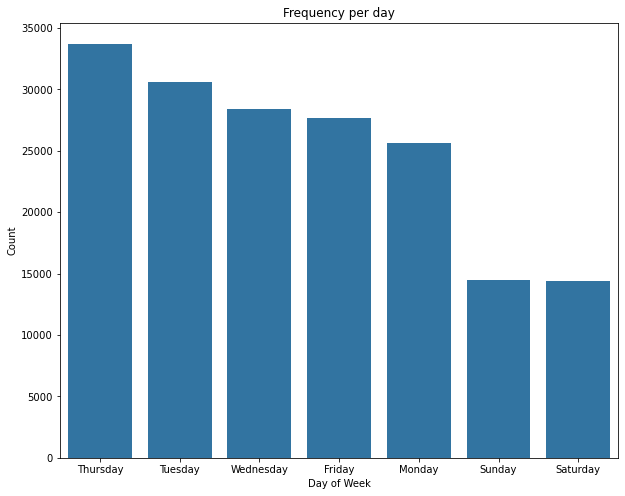

In [16]:
# The day of the week with the most trips made
plt.figure(figsize=[10,8])
sb.countplot(data = df_goBike, x = 'start_day', color = base_color, order = df_goBike['start_day'].value_counts().index);
xytitle('Day of Week','Count','Frequency per day')

### From this figure we can see that Thrusday is the day with the most frequent trips made, while Sunday and Saturday are the lowest. This maybe due to the fact that Sunday and Saturday are weekends. I would like to further investigate the durations rather than frequencies perday.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### The duration was heavily skewed to the right, transforming the duration from being presented in seconds to minutes will surely improve the perception of the graph since using seconds shows a deceptive representation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### The forms of the start time and end time were change to the proper format of date time, further more the day of the week was added in order to be able to extract information about days throughout the week


## Bivariate Exploration


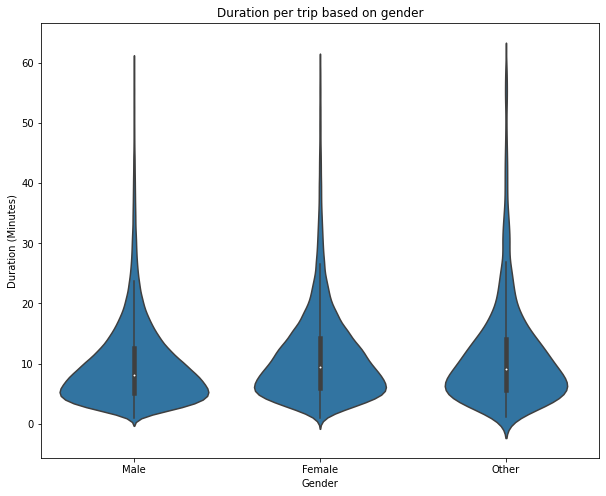

In [17]:
# Does the gender of the user have an influence of duration?
plt.figure(figsize=[10,8])
sb.violinplot(data = df_goBike.query("duration_min<=60"),x = 'member_gender',y='duration_min',color = base_color)
xytitle('Gender','Duration (Minutes)','Duration per trip based on gender')

### From what is observed in this violin plot it seems that the gender has very little influence on the duration of the trip as all shapes are almost identical. We will observe if user type has any influence on the duration

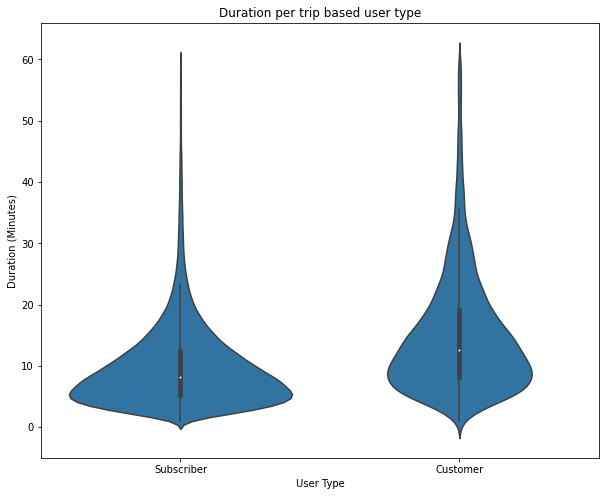

In [18]:
# Does the type of the user have an influence of duration?
plt.figure(figsize=[10,8])
sb.violinplot(data = df_goBike.query("duration_min<=60"),x = 'user_type',y='duration_min',color = base_color)
xytitle('User Type','Duration (Minutes)','Duration per trip based user type')

### It can be seen here that the user type does have an influence on the duration. It seems that subscribers are more likely to have shorter trips, while customers are slightly more likely to have longer trips

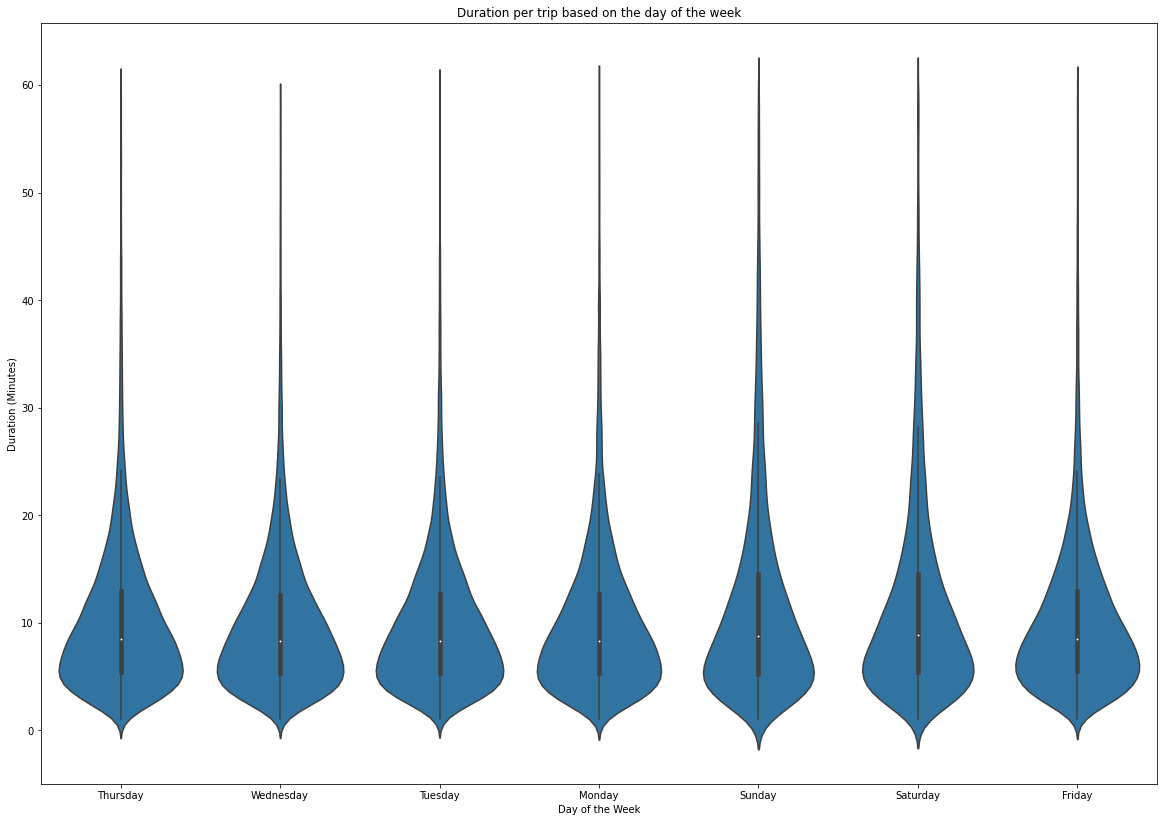

In [19]:
# Does the day of the trip have an influence of duration?
plt.figure(figsize=[20,14])
sb.violinplot(data = df_goBike.query("duration_min<=60"),x = 'start_day',y='duration_min',color = base_color)
xytitle('Day of the Week','Duration (Minutes)','Duration per trip based on the day of the week')

### The results based on the day of the week seem very similar, with the a very slight increase of duration during the week ends, however it is so small that it is almost neglegiable.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### The relationships between day of the week does not seem to be strong, however it seems that the relationship between user type and duration, surprisingly customers are more likely to take longer trips than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
#### Gender did not provide much of a difference in terms of trip duration

## Multivariate Exploration

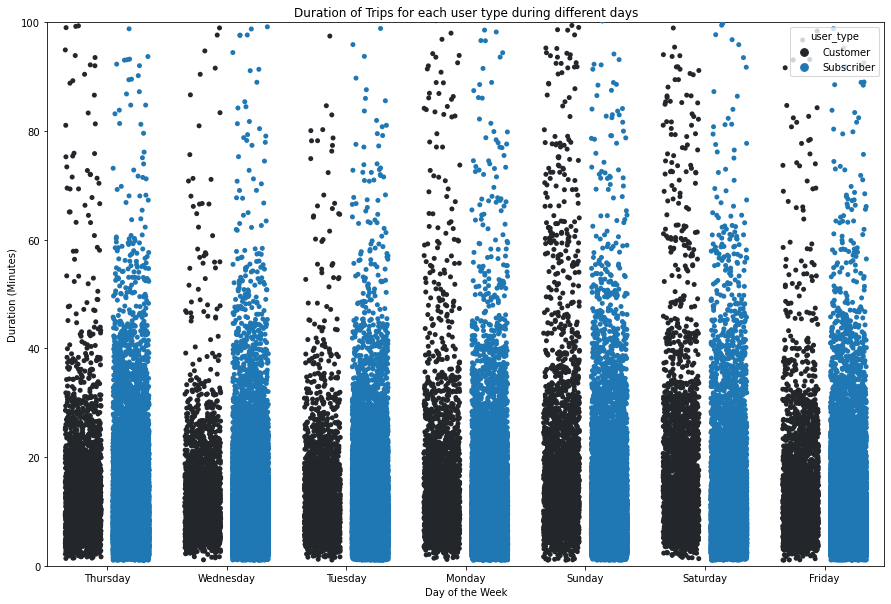

In [20]:
plt.figure(figsize=[15,10])
sb.stripplot(data = df_goBike,x = 'start_day',y='duration_min',hue='user_type',color = base_color,jitter=0.30,dodge=True);
plt.ylim(0,100)
xytitle('Day of the Week','Duration (Minutes)','Duration of Trips for each user type during different days')

#### As observed in the graph we can see that the subscribers seem to have a tendacy to have a longer duration than a customer in most days this is especially apparent in Thursday, Wednesday and Tuesday. This contradics what was mentioned above about user type and duration during bivariate exploration, this maybe be due to the significantly larger number of subscribers which gives off this effect. Another reason for this could be the existance of a large number of outliers in the customer user type.

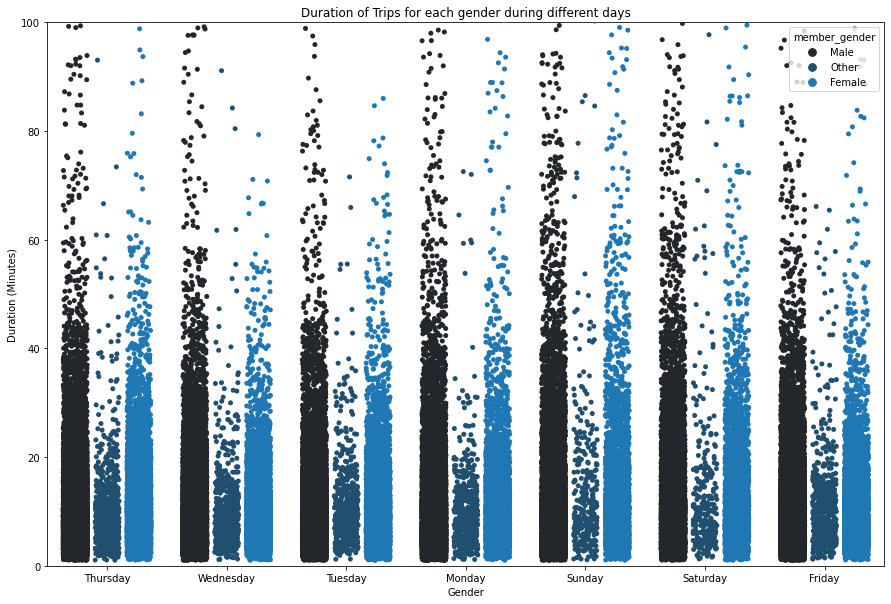

In [21]:
plt.figure(figsize=[15,10])
sb.stripplot(data = df_goBike,x = 'start_day',y='duration_min',hue='member_gender',color = base_color,jitter=0.30,dodge=True);
plt.ylim(0,100)
xytitle('Gender','Duration (Minutes)','Duration of Trips for each gender during different days')

#### From this graph shown we can observe that the majority of males have a duration below 45 minutes, while females have a slightly lower limit at a round 35 to 40 minutes, and lastly other rarely breaks the 20 minute mark.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### It seems that Subcribes are much more likely to have longer durations contrary to our previous finding that showed otherwise

### Were there any interesting or surprising interactions between features?

#### an unexpected interaction between features was the gender's influence on the duration, on a surface level gender should not exactly matter in such a case as duration but apperantly the analysis shows otherwise.

In [22]:
df_goBike.to_csv("Ford_GoBike(Final).csv", index = False)